In [54]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import cluster

## Question 1##
We just need to consider the nunmber of possible $x_{1}^mx_{2}^{n}$ such that $m + n \leq 10$ and $m,n$ are not $0$ at the same time.  
The total number of this posibility is $(11 + 1)\times 11 \times \frac{1}{2} - 1 = 65$.

Therefore, the answer to question 1 is **[e]**.

##Question 2##
Note that the hypothesis of logistic regression model takes the form of $h(x) = \frac{e^s}{1+e^s}$ where $s$ is a function fo $x$.
In this case, if $g^{(1)}(x) = \frac{e^{s_1}}{1+e^{s_1}}$ and $g^{(2)}(x) = \frac{e^{s_2}}{1+e^{s_2}}$, we can easily notice that $\bar{g}(x) = \frac{e^{s_1}+e^{s_2} + 2e^{s_1+s_2}}{2(1 + e^{s_1} +e^{s_2} + e^{s_1+s_2})} \notin \mathcal{H}$.

Therefore, the answer to question 2 is **[d]**.

##Question 3##
Consider the following senario: we have two sample points $(1,0),(-1,0)$, and the target function is $y = 0$.  
Now if we consider the following hypotheses: $h_1(x) = 0$, $h_2(x) = x^2-1$. We will notice that both functions fit the points perfectly, meaning $E_{in}=0$ for both $h_1$ and $h_2$. But cleary $h_2$ is overfitting and its $E_{out}$ will be huge if we sample more points from $y=0$ to test.  
Thus, we have demonstrated a case when there is no difference in $E_{in}$ but there is an overfitting.

Therefore, the answer to question 3 is **[a]**.

##Question 4##
One main difference between stochastic noise and deterministic noice is that deterministic noice depends on the hypothesis set $\mathcal{H}$ but stochastic noise doesn't (see lecture slides 11). This is because stochastic noise can't be captured by the hypotheses (It's the noise level $\epsilon(x) = \sigma^2$).

Therefore, the answer to question 4 is **[d]**.

##Question 5 - 6##
For question 5, since the linear regression solution, which solves the minimization problem in an unconstrainted setting, already satisfied the constraints, we can conclude that $w_{reg} = w_{lin}$ because it $w_{lin}$ will also solve the constrained (regularized) minization problem.  
For question 6, we have the following equivalence:
$$
\text{Minimize }E_{aug} = \frac{1}{N}(Zw-y)^T(Zw-y) + \frac{\lambda}{N}w^Tw
$$
is equivalent to:
$$
\text{Minimize }\frac{1}{N}(Zw-y)^T(Zw-y)\text{ subject to } w^Tw\leq C
$$
Hence, we can say that the augmented error captures the soft constraint using an additional term $\frac{\lambda}{N}w^Tw$. (See lecture slides 12).

Therefore, the answer to question 5 and 6 are:
5.  **[a]**
6.  **[b]**

##Question 7 - 10##


In [55]:
# Load datasets
D_train = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/CS 156a HWs/features.train.txt", dtype = np.float64)
D_test = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/CS 156a HWs/features.test.txt")
D_train_const = np.c_[np.ones(len(D_train)), D_train[:,1], D_train[:,2]]
D_test_const = np.c_[np.ones(len(D_test)), D_test[:,1], D_test[:,2]]

digits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
X_mat = D_train_const
Z_mat = np.c_[np.ones(len(D_train)), D_train[:,1], D_train[:,2], D_train[:,1] * D_train[:,2], D_train[:,1] ** 2, D_train[:,2] ** 2]
D_test_Z = np.c_[np.ones(len(D_test)), D_test[:,1], D_test[:,2], D_test[:,1] * D_test[:,2], D_test[:,1] ** 2, D_test[:,2] ** 2]
for n in digits:
  lam = 1
  y_train = np.array([1 if i == n else -1 for i in D_train[:,0]])
  y_test = np.array([1 if i == n else -1 for i in D_test[:,0]])
  XTX = np.matmul(X_mat.T, X_mat)
  ZTZ = np.matmul(Z_mat.T, Z_mat)
  w_reg_X = np.dot(np.matmul(np.linalg.inv(XTX + lam * np.identity(len(XTX))),X_mat.T), y_train)
  w_reg_Z = np.dot(np.matmul(np.linalg.inv(ZTZ + lam * np.identity(len(ZTZ))),Z_mat.T), y_train)
  E_in_x = np.mean(np.not_equal(np.sign(np.matmul(X_mat, w_reg_X)), y_train))
  E_out_x = np.mean(np.not_equal(np.sign(np.matmul(D_test_const, w_reg_X)), y_test))
  E_in_z = np.mean(np.not_equal(np.sign(np.matmul(Z_mat, w_reg_Z)), y_train))
  E_out_z = np.mean(np.not_equal(np.sign(np.matmul(D_test_Z, w_reg_Z)), y_test))
  print(n," versus all:")
  print("E_in with no transform:", E_in_x,"E_out with no transform:",E_out_x)
  print("E_in with transform:", E_in_z,"E_out with transform:",E_out_z)
  print(" ")

# 1 vs 5
print("For 1 versus 5:")
D_train_ovo = D_train_const[(D_train[:,0] == 1) | (D_train[:,0] == 5)]
D_test_ovo = D_test_const[(D_test[:,0] == 1) | (D_test[:,0] == 5)]
y_train_ovo = np.array([1 if i == 1 else -1 for i in D_train[:,0][(D_train[:,0] == 1) | (D_train[:,0] == 5)]])
y_test_ovo = np.array([1 if i == 1 else -1 for i in D_test[:,0][(D_test[:,0] == 1) | (D_test[:,0] == 5)]])
Z_ovo = np.c_[np.ones(len(D_train_ovo)), D_train_ovo[:,1], D_train_ovo[:,2], D_train_ovo[:,1] * D_train_ovo[:,2], D_train_ovo[:,1] ** 2, D_train_ovo[:,2] ** 2]
D_test_ovo_Z = np.c_[np.ones(len(D_test_ovo)), D_test_ovo[:,1], D_test_ovo[:,2], D_test_ovo[:,1] * D_test_ovo[:,2], D_test_ovo[:,1] ** 2, D_test_ovo[:,2] ** 2]
for lam in [0.01, 1]:
  ZTZ_ovo = np.matmul(Z_ovo.T, Z_ovo)
  w_ovo_Z = np.dot(np.matmul(np.linalg.inv(ZTZ_ovo + lam * np.identity(len(ZTZ_ovo))),Z_ovo.T), y_train_ovo)
  E_in_z_ovo = np.mean(np.not_equal(np.sign(np.matmul(Z_ovo, w_ovo_Z)), y_train_ovo))
  E_out_z_ovo = np.mean(np.not_equal(np.sign(np.matmul(D_test_ovo_Z, w_ovo_Z)), y_test_ovo))
  print("Lambda = ", lam)
  print("E_in with transform:", E_in_z_ovo,"E_out with transform:",E_out_z_ovo)
  print(" ")

0  versus all:
E_in with no transform: 0.10931285146070498 E_out with no transform: 0.11509715994020926
E_in with transform: 0.10231792621039638 E_out with transform: 0.10662680617837568
 
1  versus all:
E_in with no transform: 0.01522424907420107 E_out with no transform: 0.02242152466367713
E_in with transform: 0.012343985735838706 E_out with transform: 0.02192326856003986
 
2  versus all:
E_in with no transform: 0.10026059525442327 E_out with no transform: 0.09865470852017937
E_in with transform: 0.10026059525442327 E_out with transform: 0.09865470852017937
 
3  versus all:
E_in with no transform: 0.09024825126868742 E_out with no transform: 0.08271051320378675
E_in with transform: 0.09024825126868742 E_out with transform: 0.08271051320378675
 
4  versus all:
E_in with no transform: 0.08942531888629818 E_out with no transform: 0.09965122072745392
E_in with transform: 0.08942531888629818 E_out with transform: 0.09965122072745392
 
5  versus all:
E_in with no transform: 0.0762584007680

From the simiulations above, we can conclude that the answers to question 7 - 10 are:
7.  **[d]**
8.  **[b]**
9.  **[e]**
10.  **[a]**

## Question 11 - 12 ##

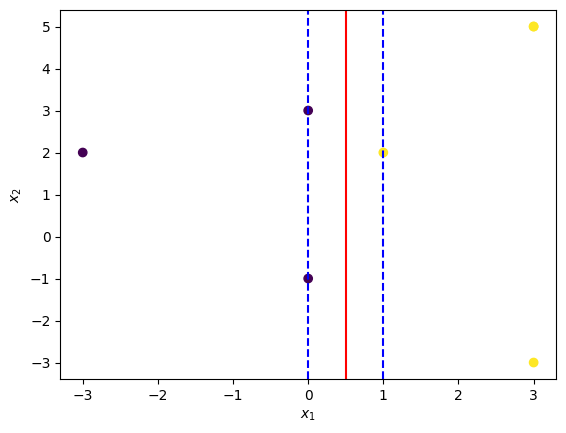

In [56]:
# Define the set and transform
X = np.array([
    [1,0],
    [0,1],
    [0,-1],
    [-1,0],
    [0,2],
    [0,-2],
    [-2,0]])
y = np.array([-1,-1,-1,1,1,1,1])
Z = np.c_[X[:,1] ** 2 - 2 * X[:,0] - np.ones(7), X[:,0] ** 2 - 2 * X[:,1] + np.ones(7)]
plt.scatter(Z[:,0], Z[:,1], c = y)
plt.axvline(x=0.5, color='r', linestyle='-')
plt.axvline(x=0, color='b', linestyle='--')
plt.axvline(x=1, color='b', linestyle='--')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

From the plot above, we can conclude that maximize the margin is $x_1 = 0.5$, which is equivalent to:
$$
\begin{bmatrix}
1 & 0
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2
\end{bmatrix}
-0.5=0
$$
Hence, we have $w^T=[1\quad 0]$ and $b = -0.5$.

Therefore, the answer to question 11 is **[c]**.

In [57]:
# Use a very large C to mimic hard-margin SVM
hard_margin = svm.SVC(C = 1e20, kernel = 'poly', degree = 2, coef0 = 1, gamma = 1)
hard_margin.fit(X, y)
print("Number of support vectors:", len(hard_margin.support_vectors_))

Number of support vectors: 5


From the simulation above, the answer to question 12 is **[c]**.

##Question 13 - 18##


In [58]:
gam = 1.5
N = 100
pi = np.pi

# Kernel form:
non_separable = 0
for run in range(10001):
  # Sampling
  samples = np.random.uniform(-1, 1, (N, 2))
  X = np.c_[np.ones(N), samples[:,0], samples[:,1]]
  y = np.sign(samples[:,1] - samples[:,0] + 0.25 * np.sin(pi * samples[:,0]))
  rbf_svc = svm.SVC(C = 1e40, kernel = 'rbf', gamma = gam)
  rbf_svc.fit(X, y)
  y_pred = rbf_svc.predict(X)
  if not(np.all(y_pred == y)):
    non_separable += 1
  if run in [2000, 4000, 6000, 8000, 10000]:
    print("Non-separable percentage = ", non_separable/run)



Non-separable percentage =  0.0
Non-separable percentage =  0.0
Non-separable percentage =  0.0
Non-separable percentage =  0.0
Non-separable percentage =  0.0


From the simulation, the answer to question 13 is **[a]**.

In [59]:
K_list = [9, 12]
gam_list = [1.5]
for gam in gam_list:
  for K in K_list:
    out_performed = 0
    for run in range(10000):
      # Sampling
      samples = np.random.uniform(-1, 1, (N, 2))
      X = np.c_[np.ones(N), samples[:,0], samples[:,1]]
      y = np.sign(samples[:,1] - samples[:,0] + 0.25 * np.sin(pi * samples[:,0]))
      test = np.random.uniform(-1, 1, (5*N, 2))
      X_test = np.c_[np.ones(5*N), test[:,0], test[:,1]]
      y_test = np.sign(test[:,1] - test[:,0] + 0.25 * np.sin(pi * test[:,0]))
      # Kernel
      rbf_svc = svm.SVC(C = 1e40, kernel = 'rbf', gamma = gam)
      rbf_svc.fit(X, y)
      y_pred = rbf_svc.predict(X_test)
      E_out_ker = np.mean(np.not_equal(y_pred, y_test))
      # Regular
      kMeans = cluster.KMeans(n_clusters = K, init = 'random', n_init = 1)
      centres = kMeans.fit(X).cluster_centers_
      phi = np.ones((N,K+1))
      for col in range(0, K):
        phi[:,col+1] = np.exp(-gam * np.linalg.norm(X - centres[col], axis = 1) ** 2)
      w = np.dot(np.matmul(np.linalg.inv(np.matmul(phi.T, phi)),phi.T),y)
      phi_test = np.ones((5*N, K+1))
      for col in range(0, K):
        phi_test[:,col+1] = np.exp(-gam * np.linalg.norm(X_test - centres[col], axis = 1) ** 2)
      y_reg = np.sign(np.matmul(phi_test, w))
      E_out_reg = np.mean(np.not_equal(y_reg, y_test))
      if E_out_ker < E_out_reg:
        out_performed += 1
      if run in [3000,6000,9000]:
        print(run)
    print("Gamma = ",gam,"K = ",K,"Percentage kernel beats regular = ",out_performed/10000)

3000
6000
9000
Gamma =  1.5 K =  9 Percentage kernel beats regular =  0.8852
3000
6000
9000
Gamma =  1.5 K =  12 Percentage kernel beats regular =  0.7836


From the simulations, the answers to question 13 - 15 are:
13.  **[a]**
14.  **[e]**
15.  **[d]**

In [60]:
# Now we need to compare for the same set of data
K_list = [9, 12]
gam = 1.5
situation = np.zeros(5)
E_in_list = np.zeros((10000,2))
E_out_list = np.zeros((10000,2))
for run in range(10000):
  samples = np.random.uniform(-1, 1, (N, 2))
  X = np.c_[np.ones(N), samples[:,0], samples[:,1]]
  y = np.sign(samples[:,1] - samples[:,0] + 0.25 * np.sin(pi * samples[:,0]))
  test = np.random.uniform(-1, 1, (5*N, 2))
  X_test = np.c_[np.ones(5*N), test[:,0], test[:,1]]
  y_test = np.sign(test[:,1] - test[:,0] + 0.25 * np.sin(pi * test[:,0]))
  for k in range(2):
    K = K_list[k]
    kMeans = cluster.KMeans(n_clusters = K, init = 'random', n_init = 1)
    centres = kMeans.fit(X).cluster_centers_
    phi = np.ones((N,K+1))
    for col in range(0, K):
      phi[:,col+1] = np.exp(-gam * np.linalg.norm(X - centres[col], axis = 1) ** 2)
    w = np.dot(np.matmul(np.linalg.inv(np.matmul(phi.T, phi)),phi.T),y)
    phi_test = np.ones((5*N, K+1))
    for col in range(0, K):
      phi_test[:,col+1] = np.exp(-gam * np.linalg.norm(X_test - centres[col], axis = 1) ** 2)
    y_reg_in = np.sign(np.matmul(phi, w))
    y_reg = np.sign(np.matmul(phi_test, w))
    E_in_reg = np.mean(np.not_equal(y_reg_in, y))
    E_out_reg = np.mean(np.not_equal(y_reg, y_test))
    E_in_list[run][k] = E_in_reg
    E_out_list[run][k] = E_out_reg

E_in_compare = E_in_list[:,1] - E_in_list[:,0]
E_out_compare = E_out_list[:,1] - E_out_list[:,0]
for i in range(10000):
  if E_in_compare[i] < 0  and E_out_compare[i] > 0:
    situation[0] +=1
  elif E_in_compare[i] > 0  and E_out_compare[i] < 0:
    situation[1] +=1
  elif E_in_compare[i] > 0  and E_out_compare[i] > 0:
    situation[2] +=1
  elif E_in_compare[i] < 0  and E_out_compare[i] < 0:
    situation[3] +=1
  else:
    situation[4] +=1

result = np.argmax(situation)
print("K from 9 to 12:")
if result == 0:
  print("E_in goes down, but E_out goes up")
elif result == 1:
  print("E_in goes up, but E_out goes down")
elif result == 2:
  print("Both E_in and E_out go up")
elif result == 3:
  print("Both E_in and E_out go down")
else:
  print("Remain the same")

K from 9 to 12:
Both E_in and E_out go down


From the simulation above, the answer to question 16 is **[d]**.


In [61]:
K = 9
gam_list = [1.5, 2]
situation = np.zeros(5)
E_in_list = np.zeros((10000,2))
E_out_list = np.zeros((10000,2))
for run in range(10000):
  samples = np.random.uniform(-1, 1, (N, 2))
  X = np.c_[np.ones(N), samples[:,0], samples[:,1]]
  y = np.sign(samples[:,1] - samples[:,0] + 0.25 * np.sin(pi * samples[:,0]))
  test = np.random.uniform(-1, 1, (5*N, 2))
  X_test = np.c_[np.ones(5*N), test[:,0], test[:,1]]
  y_test = np.sign(test[:,1] - test[:,0] + 0.25 * np.sin(pi * test[:,0]))
  for g in range(2):
    gam = gam_list[k]
    kMeans = cluster.KMeans(n_clusters = K, init = 'random', n_init = 1)
    centres = kMeans.fit(X).cluster_centers_
    phi = np.ones((N,K+1))
    for col in range(0, K):
      phi[:,col+1] = np.exp(-gam * np.linalg.norm(X - centres[col], axis = 1) ** 2)
    w = np.dot(np.matmul(np.linalg.inv(np.matmul(phi.T, phi)),phi.T),y)
    phi_test = np.ones((5*N, K+1))
    for col in range(0, K):
      phi_test[:,col+1] = np.exp(-gam * np.linalg.norm(X_test - centres[col], axis = 1) ** 2)
    y_reg_in = np.sign(np.matmul(phi, w))
    y_reg = np.sign(np.matmul(phi_test, w))
    E_in_reg = np.mean(np.not_equal(y_reg_in, y))
    E_out_reg = np.mean(np.not_equal(y_reg, y_test))
    E_in_list[run][g] = E_in_reg
    E_out_list[run][g] = E_out_reg

E_in_compare = E_in_list[:,1] - E_in_list[:,0]
E_out_compare = E_out_list[:,1] - E_out_list[:,0]
for i in range(10000):
  if E_in_compare[i] < 0  and E_out_compare[i] > 0:
    situation[0] +=1
  elif E_in_compare[i] > 0  and E_out_compare[i] < 0:
    situation[1] +=1
  elif E_in_compare[i] > 0  and E_out_compare[i] > 0:
    situation[2] +=1
  elif E_in_compare[i] < 0  and E_out_compare[i] < 0:
    situation[3] +=1
  else:
    situation[4] +=1

result = np.argmax(situation)
print("Gamma from 1.5 to 2")
if result == 0:
  print("E_in goes down, but E_out goes up")
elif result == 1:
  print("E_in goes up, but E_out goes down")
elif result == 2:
  print("Both E_in and E_out go up")
elif result == 3:
  print("Both Ein and Eout go down")
else:
  print("Remain the same")

Gamma from 1.5 to 2
Both E_in and E_out go up


Therefore, from the simulation, the answer to question 17 is **[c]**.

In [62]:
print("Percentage of time when E_in = 0:", np.sum(E_in_list[:,0] == 0)/10000)

Percentage of time when E_in = 0: 0.024


Therefore, from the simulation, the answer to question 18 is **[a]**.

##Question 19##

Since the sample point had a heart attack, we know that higher $h$ will have higher likelihood. Thus, the posterior should be increasing.  
Also, Since we know the following formula:
$$
P(h = f|D) \propto P(h = f)P(D|h = f)
$$
We know that the increase should be linear.

Therefore, the answer to question 19 is **[b]**.

##Question 20##
The errors of $g_1$ and $g_2$ are given by:
For any $x\in X$, the squared error for $g_1$ and $g_2$ are:
$$e_1 = (g_1(x)-f(x))^2, e_2 = (g_2(x)-f(x))^2$$
And for $g(x) = \frac{1}{2}(g_1(x)+g_2(x))$, we have:
$$e_g = \frac{1}{4}(e_1 + e_2) + \frac{1}{2}(g_1(x)-f(x))(g_2(x)-f(x)) = \frac{1}{4}(e_1 + e_2) + \frac{1}{2}\sqrt{e_1e_2}$$
By AM-GM inequality, we have $\frac{1}{2}(e_1 + e_2) \geq \sqrt{e_1e_2}$
Hence, we have the following:
$$
e_g = \frac{1}{4}(e_1 + e_2) + \frac{1}{2}\sqrt{e_1e_2} \leq \frac{1}{4}(e_1 + e_2) + \frac{1}{4}(e_1 + e_2) = \frac{1}{2}(e_1 + e_2)
$$
Thus, for any $x\in X$, $e_g$ is smaller than the average of $e_1$ and $e_2$. Hence, we have that $E_{out}(g)$ can't be worse than the average of $E_{out}(g_1)$ and $E_{out}(g_2)$.

Therefore, the answer to question 20 is **[c]**.

